In [24]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# 1. Random Data Generator

## a. Univariate gaussian data generator

Since a $N(\mu,\sigma^2)$ can be generated as $X = \mu + \sigma Z$  where Z is standard normal<br>
The Box-Muller method uses two independent random numbers U and V distributed uniformly in (0,1). Then the two random variables X and Y.<br>
$X = \sqrt{-2\ln U}\cos(2\pi V)$ 

In [25]:
def univariate_gaussian_data_generator(m, s):    
    # Box-Muller method
    U = np.random.uniform(0,1)
    V = np.random.uniform(0,1)
    Z = np.sqrt(-2*np.log(U))*math.cos(2*math.pi*V)
    
    data = m + s**0.5*Z # output
    
    return data

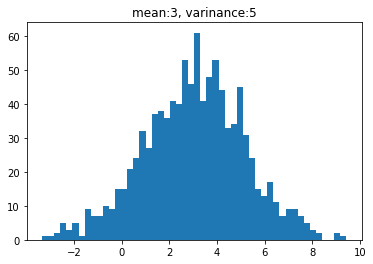

In [26]:
m = 3
s = 5
n_samples = 1000
data = []

for i in range (n_samples):
    data.append(univariate_gaussian_data_generator(m, s))

plt.hist(data, 50)
plt.title('mean:{}, varinance:{}'.format(m,s))
plt.show()

## b. Polynomial basis linear model data generator

$y = W^T \phi(x) + e$ <br>
$W$ is a $n \times 1$ vector<br>
$e ～　N(0,a)$<br>
$-1.0 < x < 1.0$

In [27]:
def poly_basis_linear_model_gen(n, a, w):
    y = 0
    x = np.random.uniform(-1.0,1.0)
    for i in range(n):
        y += w[i]*x**i
    e = univariate_gaussian_data_generator(0, a)
    y = y + e
    #print('data from poly_gen ({}, {})'.format(x, y))
    return x, y

In [28]:
n = 2
a = 10
w = (2, 5)
poly_basis_linear_model_gen(n, a, w)

(0.1958033390809526, 5.386255807380749)

# 2. Sequential Estimator

HINT: Welford's online algorithm<br>
It is often to be able to compute the variance in a single pass, inspecting each value $x_{i}$ . <br>
The following formula cna be used to update the mean and .(estimated) variance of the sequence, for an additional element $x_{n}$. Here $\bar{x}_{n}$ denotes the sample mean of the first $n$ samples $(x_{1},....,x{n})$,<br>
$\sigma_{n}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ thier biased sample vairance.<br>
$s_{n}^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ their unbiased sample variance.<br>
$\sum_{i=1}^{n} (x_{i} - \bar{x}_{n})^2$ here denoted $M_{2,n}$<br>
$M_{2,n} = M_{2,n-1} + (x_{n} - \bar{x}_{n-1})(x_{n}-\bar{x}_{n})$<br>
$\sigma^2_{n} = \frac{M_{2,n}}{n}$<br>
$s^2_{n} = \frac{M_{2,n}}{n-1}$<br>
It is also common to denote $M_{k} = \bar{x}_{k} $ and $S_{k} = M_{2,k}$

In [29]:
# For a new value newValue, compute the new count, new mean, the new M2.
# mean accumulates the mean of the entire dataset
# M2 aggregates the squared distance from the mean
# count aggregates the number of samples seen so far
def update(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2
    return (count, mean, M2)

# Retrieve the mean, variance and sample variance from an aggregate
def finalize(existingAggregate):
    (count, mean, M2) = existingAggregate
    if count == 0:
        (mean, variance, sampleVariance) = (999, 0, 0)
    else:
        (mean, variance, sampleVariance) = (mean, M2 / count, M2 / (count - 1))
        #print('count: {}'.format(count))
        print('Mean={} Varaince={} '.format(mean, variance))
        print()
    return (mean, variance, sampleVariance)

def sequential_estimator(data):
    count = 0
    mean = 0
    M2 = 0
    new_mean = 0
    new_M2 = 0
    sample_variance = 0
    for i in range(len(data)):
        existingAggregate = (count, mean, M2)
        newAggregate = (count, new_mean, new_M2)
        new_data = data[i]
        print('Add data point: {}'.format(new_data))
        
        newAggregate = update(existingAggregate, new_data)
        new_mean, new_variance, sample_variance = finalize(newAggregate)
        
        # break mean - mean
        count += 1

In [30]:
m = 3.0
s = 5.0
data = []
for i in range(n_samples):
    data.append(univariate_gaussian_data_generator(m, s))

estimation = sequential_estimator(data)

Add data point: 0.725887024356823
Mean=0.725887024356823 Varaince=0.0 

Add data point: 3.5137053698807805
Mean=1.7568526849403903 Varaince=3.0865313565822583 

Add data point: 4.583096006541034
Mean=1.5276986688470113 Varaince=4.66772644559386 

Add data point: 3.074058604588908
Mean=0.768514651147227 Varaince=1.771844307083832 

Add data point: -0.032404688164707984
Mean=-0.006480937632941597 Varaince=0.0001680102104083145 

Add data point: 3.157945838177978
Mean=0.5263243063629963 Varaince=1.3850863773424458 

Add data point: 0.8076685856563395
Mean=0.11538122652233421 Varaince=0.07987696460278919 

Add data point: 1.6000719967690111
Mean=0.2000089995961264 Varaince=0.28002519943610304 

Add data point: 4.845411491229337
Mean=0.5383790545810374 Varaince=2.3188160512925733 

Add data point: 2.7608146319971176
Mean=0.2760814631997118 Varaince=0.6859887689024442 

Add data point: 1.9726895896058845
Mean=0.17933541723689858 Varaince=0.321611918755325 

Add data point: 3.2274490396735804

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


# 3. Baysian Linear regression

## Input 

The precision for initial prior $w ～ N(0,b^{-1}I)$ <br>
All other required inputs for the polynomial basis linear model generator(1.b)<br>

In [31]:
b = 1
n = 3
a = 3
w = (1,2,3)
data = []
point_x=[]
point_y=[]

mean_record = []
variance_record = []

# N(0,b^-1I)
mean = np.zeros((n,1))
variance = (1/b)*np.identity(n) 

for i in range(n_samples):
    data.append(poly_basis_linear_model_gen(n, a, w))

### Deriving posterior probability$P(W|D)$for Bayesian regression 

#### -Update Note

$\bigwedge_{new} = ax^{T}x + b$, new precision matrix $\bigwedge_{new}$<br>
$\mu_{new} = a\bigwedge_{new}^{-1}x^{T}Y$<br>
$\mu_{new} = \bigwedge^{-1}(aX^{T}y+Sm)$ (modified)<br>
$a = scalar, which\ is\ our\ noise\ variace$<br>
$x = design \ matrix = \begin{bmatrix} x_{0} \\ x_{1} \\ x_{2} \end{bmatrix}$<br>
$b = prior\ precision\ matrix\ = bI = \begin{bmatrix} b&0&0 \\ 0&b&0 \\ 0&0&b \end{bmatrix}$<br>
$Y = scalar\ data\ Y_{i}$<br>
$\bigwedge_{new} = matrix\ 3 \times 3$<br>
$\mu = matrix\ 3 \times 1$

#### -Predict Note

$\mu_{new} = \mu^{T}x$<br>
$\bigwedge_{new}^{-1} = \sigma_{new}^{2} = \frac{1}{a} + x^{T}\bigwedge x$

In [32]:
def to_X(x_value):
    X = np.zeros((1,n))
    for i in range(n):
        X[0,i] = x_value**i
    return X

def update(a, X, Y, mean, variance):
    S = np.linalg.pinv(variance)
    #covariance_new = a*X.T@X + variance
    variance_new=np.linalg.pinv(a*X.T@X+S)
    mean_new = variance_new@(a*X.T*Y + S@mean)
    return variance_new, mean_new

def baysian_linear_regression(data, mean, variance):
    
    for i in range(len(data)):
    
        # Update
        point = data[i]
        print('Add data point {}:'.format(point))
        X = to_X(point[0])
        Y = point[1]
        variance_new, mean_new = update(a, X, Y, mean, variance)
        print('Posterior mean:')
        print(mean_new)
        print()
        print('Posterior variance:')
        print(variance_new)
        print('---------------------------------------------------------------------')
        
        # Predict
        mean_pred = (X@mean_new).item()
        variance_pred = ((1/a) + X@variance_new@X.T).item()
        print('Predictive distribution ~ N({}, {})'.format(mean_pred, variance_pred))
        print()
        
        # Record 
        mean_record.append(mean_new)
        variance_record.append(variance_new)
        
        # Save
        point_x.append(point[0])
        point_y.append(point[1])
        
        # update
        mean = mean_new
        variance = variance_new
    
    return mean_record, variance_record, point_x, point_y

def visualize(x, mean, variance, w):
    gt_mean = np.zeros(500)
    gt_variance = np.zeros(500)
    _mean_predict = np.zeros((n_samples,500))
    _variance_predict = np.zeros((n_samples,500))
    for j in range(n_samples):
        for i in range(len(x)):
            X = to_X(x[i])
            _mean_predict[j][i]=(X@mean[j]).item()
            _variance_predict[j][i]=((a)+X@variance[j]@X.T).item()
    
    for i in range(len(x)):
        X = to_X(x[i])
        gt_mean[i] = (X@w).item()
        gt_variance[i] = ((a)+X@np.zeros((n,n))@X.T).item()
        
    plt.subplot(2,2,1)    
    plt.plot(point_x[:0],point_y[:0],'bo')
    plt.plot(x,gt_mean,'k-')
    plt.plot(x,gt_mean+gt_variance,'r-')
    plt.plot(x,gt_mean-gt_variance,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('Ground Truth')
    

    mean_predict = _mean_predict[n_samples-1]
    variance_predict = _variance_predict[n_samples-1]
    plt.subplot(2,2,2)    
    plt.plot(point_x[:n_samples],point_y[:n_samples],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('Predict Result')
    
    mean_predict = _mean_predict[9]
    variance_predict = _variance_predict[9]
    plt.subplot(2,2,3)    
    plt.plot(point_x[:10],point_y[:10],'bo')
    plt.plot(x,_mean_predict[9],'k-')
    plt.plot(x,_mean_predict[9]+_variance_predict[9],'r-')
    plt.plot(x,_mean_predict[9]-_variance_predict[9],'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('After 10 incomes')
    
    mean_predict = _mean_predict[49]
    variance_predict = _variance_predict[49]
    plt.subplot(2,2,4)    
    plt.plot(point_x[:50],point_y[:50],'bo')
    plt.plot(x,_mean_predict[49],'k-')
    plt.plot(x,_mean_predict[49]+_variance_predict[49],'r-')
    plt.plot(x,_mean_predict[49]-_variance_predict[49],'r-')
    plt.xlim(-2,2)
    plt.ylim(-20,20)
    plt.title('After 50 incomes')
    
    plt.tight_layout()
    
    
    

In [33]:
mean_record, variance_record, point_x, point_y =  baysian_linear_regression(data, mean, variance)

Add data point (0.3079174523568924, 0.8261334490313497):
Posterior mean:
[[0.57484708]
 [0.17700545]
 [0.05450307]]

Posterior variance:
[[ 0.30417164 -0.2142577  -0.06597368]
 [-0.2142577   0.93402632 -0.02031445]
 [-0.06597368 -0.02031445  0.99374483]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.6345177554344568, 0.5893524047389823)

Add data point (-0.2201915930709737, 0.8632496843266513):
Posterior mean:
[[7.21006190e-01]
 [3.01949121e-04]
 [4.89113100e-02]]

Posterior variance:
[[ 0.14747351 -0.02481272 -0.05997872]
 [-0.02481272  0.70499105 -0.02756224]
 [-0.05997872 -0.02756224  0.99351547]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.7233111356993518, 0.5230229004137127)

Add data point (0.1993062769096312, -0.01702840523755067):
Posterior mean:
[[ 0.51160616]
 [-0.17093114]
 [ 0.0877694 ]]

Posterior variance:
[[ 0.10781809 -0.05724022 -0.05261992]
 [-0.05724022  0.6

Posterior variance:
[[ 0.0035117  -0.00021313 -0.00586464]
 [-0.00021313  0.00435021  0.00017014]
 [-0.00586464  0.00017014  0.0170803 ]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.7786512361686092, 0.3367614608685585)

Add data point (-0.4212099402131686, 1.409726052974737):
Posterior mean:
[[1.03835172]
 [2.2201182 ]
 [3.12401822]]

Posterior variance:
[[ 0.0034922  -0.00019778 -0.0058425 ]
 [-0.00019778  0.00433813  0.00015273]
 [-0.0058425   0.00015273  0.01705518]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.6574723498034566, 0.33620270181262996)

Add data point (-0.08726198633427518, 2.19693263234481):
Posterior mean:
[[1.05201926]
 [2.21784943]
 [3.1014322 ]]

Posterior variance:
[[ 0.00345655 -0.00019187 -0.0057836 ]
 [-0.00019187  0.00433715  0.00014295]
 [-0.0057836   0.00014295  0.01695783]]
---------------------------------------------------------------------
Pre

Add data point (0.0580101411578271, 1.471312112317844):
Posterior mean:
[[0.96743965]
 [2.17069034]
 [3.18455402]]

Posterior variance:
[[ 1.65088265e-03 -7.48023125e-05 -2.78367541e-03]
 [-7.48023125e-05  2.23945688e-03  6.17896890e-05]
 [-2.78367541e-03  6.17896890e-05  8.47552751e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.1040782931519297, 0.33496445854851753)

Add data point (-0.11366063856117625, 1.640573725308043):
Posterior mean:
[[0.97169846]
 [2.16982846]
 [3.17752028]]

Posterior variance:
[[ 1.64301452e-03 -7.32099915e-05 -2.77068061e-03]
 [-7.32099915e-05  2.23913463e-03  5.91598513e-05]
 [-2.77068061e-03  5.91598513e-05  8.45406563e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.7661239319754587, 0.33495156663136827)

Add data point (-0.28169650261919643, 0.4905264145365221):
Posterior mean:
[[0.971172  ]
 [2.17008345]
 [3.17829205]]

Posterior variance:


Posterior variance:
[[ 1.15749853e-03 -4.84018787e-05 -1.97113129e-03]
 [-4.84018787e-05  1.60367357e-03  1.70249978e-04]
 [-1.97113129e-03  1.70249978e-04  6.08486140e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(5.889196562269369, 0.3376436626640212)

Add data point (-0.24104390408200138, 3.3355532817143816):
Posterior mean:
[[0.93500197]
 [2.19792915]
 [3.11246659]]

Posterior variance:
[[ 1.15417233e-03 -4.70612727e-05 -1.96590019e-03]
 [-4.70612727e-05  1.60313325e-03  1.68141613e-04]
 [-1.96590019e-03  1.68141613e-04  6.07663447e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(0.5860455930163437, 0.334390696903201)

Add data point (0.32005706094190955, 3.632499397683959):
Posterior mean:
[[0.9397011 ]
 [2.20035084]
 [3.10600409]]

Posterior variance:
[[ 1.15154190e-03 -4.84168603e-05 -1.96228267e-03]
 [-4.84168603e-05  1.60243465e-03  1.70005889e-04]
 [-1.96228267e-03

 [3.03848136]]

Posterior variance:
[[ 8.59145005e-04 -2.83891440e-05 -1.44435788e-03]
 [-2.83891440e-05  1.19679487e-03  8.73027214e-05]
 [-1.44435788e-03  8.73027214e-05  4.43971232e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.0982750313353515, 0.3345843877853351)

Add data point (0.16203121379031682, -0.05466584861267276):
Posterior mean:
[[0.99100118]
 [2.11896794]
 [3.04427035]]

Posterior variance:
[[ 8.57149223e-04 -2.87992886e-05 -1.44114740e-03]
 [-2.87992886e-05  1.19671058e-03  8.79624945e-05]
 [-1.44114740e-03  8.79624945e-05  4.43454782e-03]]
---------------------------------------------------------------------
Predictive distribution ~ N(1.4142647462694642, 0.3341407012895391)

Add data point (-0.4748789589775215, 1.3438622047181383):
Posterior mean:
[[0.99210021]
 [2.11780563]
 [3.04329806]]

Posterior variance:
[[ 8.56257327e-04 -2.78560467e-05 -1.44035836e-03]
 [-2.78560467e-05  1.19571303e-03  8.71280323e-05

##  Visiualization

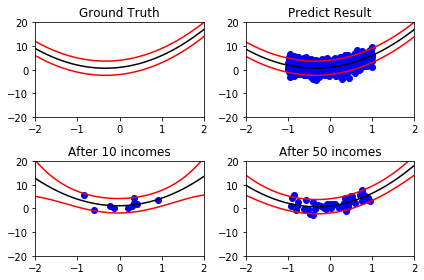

In [34]:
x=np.linspace(-2,2,500)
visualize(x, mean_record, variance_record, w)